<a href="https://colab.research.google.com/github/kavyajeetbora/ASI/blob/master/development/ASI_with_district.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up environment

In [1]:
!git --version
!pip install -q pydeck

git version 2.46.2.windows.1



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kb8kt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
from google.colab import drive
import json
import matplotlib.colors as mp_color
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydeck as pdk
import numpy as np
import base64
drive.mount("/gdrive")

ModuleNotFoundError: No module named 'plotly'

In [11]:
import os
os.getcwd()

'C:\\Users\\kb8kt\\OneDrive - University of Missouri\\Desktop\\Licensing Exploitation\\ASI_Firms'

In [12]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------  317.4/323.6 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.6/16.2 MB 12.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/16.2 MB 20.3 MB/s eta 0:00:01
   ------------ --------------------------- 4.9/16.2 MB 34.8 MB/s eta 0:00:01
   -------------------- ------------------- 8.4/16.2 MB 45.1 MB/s eta 0:00:01
   ---------------------------- ----------- 11.7/16.2 MB 65.6 MB/s eta 0:00:01
   -------------------------------------- - 15.4/16.2 MB 81.8 MB/s eta 0:00:01
   -------------------------------------- - 15.7/16.2 MB 65.6 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 50.4 MB/s eta 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kb8kt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import geopandas as gpd

In [3]:
cd "C:\Users\kb8kt\OneDrive - University of Missouri\Desktop\Licensing Exploitation\ASI_Firms"

C:\Users\kb8kt\OneDrive - University of Missouri\Desktop\Licensing Exploitation\ASI_Firms


C:\Users\kb8kt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
.venv\Scripts\activate

SyntaxError: invalid syntax (131427781.py, line 1)

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kb8kt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
python -m pip install pandas

SyntaxError: invalid syntax (554273624.py, line 1)

In [7]:
python --version

NameError: name 'python' is not defined

In [8]:
pip --version

pip 24.0 from C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [9]:
python -m ensurepip --upgrade

SyntaxError: invalid syntax (24040424.py, line 1)

[Pyreadstat docs](https://github.com/Roche/pyreadstat?tab=readme-ov-file)

## Load the aggregate file

In [3]:
df_asi = pd.read_csv("/gdrive/MyDrive/Projects/Annual Survey of India/Data/ASI_aggregate.csv")
df_asi[['district_code', 'state_code', 'sector_code', 'nic_code']] = df_asi[['district_code', 'state_code', 'sector_code', 'nic_code']].astype(int)
df_asi.sample(5)

,dsl,scheme_code,nic_code,state_code,district_code,sector_code,year,ownership,opening_gross_value,closing_gross_value,...,total,rent_royalties_x,rent_rcvd_bldg,rent_royalties_y,int_received,rent_rcvd_land,gross_value,bonus,prov_fund,wel_exp
158185,45006,1,23101,10,32,1,2007_2008,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
73199,24724,1,26933,24,21,1,2004_2005,6.0,518893160,519151254,...,0,0,0,0,0,0,0,0,0,0
23844,10349,1,32109,2,9,2,2001_2002,6.0,34660606,34964445,...,0,0,0,0,22548,0,0,0,0,0
104824,15969,1,15493,32,13,1,2006_2007,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
127532,10484,1,25207,9,9,2,2007_2008,6.0,333942503,336447397,...,0,0,0,0,357963,0,0,0,0,0


In [4]:
df_asi.columns

Index(['dsl', 'scheme_code', 'nic_code', 'state_code', 'district_code',
       'sector_code', 'year', 'ownership', 'opening_gross_value',
       'closing_gross_value', 'opening_net_value', 'closing_net_value',
       'man_total_C', 'wages_total_C', 'bonus_C', 'prov_fund_C', 'wel_exp_C',
       'man_total_TW', 'wages_total_TW', 'bonus_TW', 'prov_fund_TW',
       'wel_exp_TW', 'man_total_SM', 'wages_total_SM', 'bonus_SM',
       'prov_fund_SM', 'wel_exp_SM', 'man_total_T', 'wages_total_T', 'bonus_T',
       'prov_fund_T', 'wel_exp_T', 'op_expenses', 'total_exp',
       'rent_paid_bldg', 'rent_paid_land', 'int_paid', 'tot_receipts',
       'pur_value_ind', 'pur_value_imp', 'gross_sale', 'excise_duty',
       'sales_tax', 'others_product', 'total', 'rent_royalties_x',
       'rent_rcvd_bldg', 'rent_royalties_y', 'int_received', 'rent_rcvd_land',
       'gross_value', 'bonus', 'prov_fund', 'wel_exp'],
      dtype='object')

## Import State and District Codes

In [5]:
%%time
#get spreadsheets key from url
gsheetkey = "13pww_gy5mRuEVjxUzXWz2sHw3QCthhb6BSrW2Xm_hSw"

#sheet name
sheet_name = 'LGD_Districts'

url=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=xlsx'
df_district =  pd.read_excel(url,sheet_name=sheet_name)
df_district['unique_id'] = df_district['asi_district'].astype(str) + "_" + df_district['state_code'].astype(str)
df_district.head()

CPU times: user 2.57 s, sys: 151 ms, total: 2.72 s
Wall time: 7.38 s


,State,ec_district_code,asi_district,District Name,state_code_old,state_code,Dist_LGD,headquarter,latitude,longitude,formation_date,formation_details,unique_id
0,J &K,1,1,Kupwara,1,1,8,Kupwara,34.5312,74.2533,1979,Formed from Baramulla district,1_1
1,J &K,2,4,Badgam,1,1,2,Budgam,34.0180,74.7241,1979,Formed from Srinagar district,4_1
2,J &K,3,7,Leh(Ladakh),1,1,9,Leh,34.1642,77.5848,1979,Formed from parts of Leh and Kargil districts,7_1
3,J &K,4,8,Kargil,1,1,6,Kargil,34.5563,76.1320,1979,Formed from parts of Leh district,8_1
4,J &K,5,11,Punch,1,1,10,Poonch,33.7700,74.0920,1947,Formed from parts of Jammu district,11_1


## Dowloading the shape files

- State Boundaries
- District Boundaries

Few resources have been identified from where we can download the shapefiles:

1. [mapog.com](https://gisdata.mapog.com/india)
2. [Shapefiles for districts in india](https://github.com/abhatia08/india_shp_2020/raw/refs/heads/master/district)
3. [India's official boundaries](https://github.com/justinelliotmeyers/India_Official_Boundaries_2019/tree/master)
4. [Histortical District Boundaries](https://international.ipums.org/international/gis_yrspecific_2nd.shtml)

State and District Codes:

1. [State Code](https://lgdirectory.gov.in/globalviewstateforcitizen.do?OWASP_CSRFTOKEN=LDOV-3PVM-TO9P-9184-LFPM-MSI3-GVTY-8YQI)
2. [District Codes](https://lgdirectory.gov.in/globalviewdistrictforcitizen.do?OWASP_CSRFTOKEN=H0KG-RBQ4-BG0Y-29OF-5O7U-T5PY-VAP1-5FZR)
3. [MOSPI - District Codes and its Names](https://mospi.gov.in/sites/default/files/6ec_dirEst/ec6_district_code_&_names.html)

We can also merge some data from wikidata database if any additional information is required

In [6]:
gdf = gpd.read_file(r"/gdrive/MyDrive/Projects/Annual Survey of India/Data/District Shape file/in_district.shp")
gdf[['Dist_LGD']] = gdf[['Dist_LGD']].astype(int)
gdf = gdf[['Dist_LGD','stname','dtname','geometry']].copy()
print(gdf.shape)
gdf.head()

(735, 4)


,Dist_LGD,stname,dtname,geometry
0,8,JAMMU & KASHMIR,Kupwara,"POLYGON ((74.33744 34.78209, 74.34695 34.78019..."
1,623,JAMMU & KASHMIR,Bandipore,"POLYGON ((74.73338 34.67121, 74.74956 34.66883..."
2,3,JAMMU & KASHMIR,Baramula,"POLYGON ((74.51946 34.42533, 74.5209 34.42237,..."
3,626,JAMMU & KASHMIR,Ganderbal,"POLYGON ((74.94144 34.46384, 74.94554 34.46247..."
4,1,JAMMU & KASHMIR,Anantnag,"POLYGON ((75.26949 34.25584, 75.27242 34.25356..."


In [7]:
gdf['geometry'].apply(lambda x: x.geom_type).value_counts()

,count
geometry,
Polygon,683
MultiPolygon,52


In [8]:
gdf['Dist_LGD'].value_counts()

,count
Dist_LGD,
0,2
8,1
436,1
433,1
425,1
...,...
189,1
226,1
228,1


## Join District Codes and ASI Data

Standardise the district codes as per [Local Government Directory](https://lgdirectory.gov.in/globalviewdistrictforcitizen.do?OWASP_CSRFTOKEN=H0KG-RBQ4-BG0Y-29OF-5O7U-T5PY-VAP1-5FZR)


Before joining the districts with the ASI data, we will first merge all the district geometries as the geometries are 2020 version and ASI districts are before 2010. So the geometries might have more districts than the ASI districts which might have been added later. So We will merge all the districts that are newly created


### Merge district codes with geometries

In [9]:
districts = pd.merge(
    left= gdf,
    right = df_district,
    on = "Dist_LGD",
    how='left'
)
districts = gpd.GeoDataFrame(districts, geometry='geometry')
print(f"Total districts:{districts.shape[0]}")
districts.head()

Total districts:735


,Dist_LGD,stname,dtname,geometry,State,ec_district_code,asi_district,District Name,state_code_old,state_code,headquarter,latitude,longitude,formation_date,formation_details,unique_id
0,8,JAMMU & KASHMIR,Kupwara,"POLYGON ((74.33744 34.78209, 74.34695 34.78019...",J &K,1.0,1.0,Kupwara,1.0,1.0,Kupwara,34.5312,74.2533,1979.0,Formed from Baramulla district,1_1
1,623,JAMMU & KASHMIR,Bandipore,"POLYGON ((74.73338 34.67121, 74.74956 34.66883...",J &K,9.0,2.0,Bandipore,1.0,1.0,Bandipora,34.4220,74.6430,2007.0,Formed from Baramulla district,2_1
2,3,JAMMU & KASHMIR,Baramula,"POLYGON ((74.51946 34.42533, 74.5209 34.42237,...",J &K,8.0,2.0,Baramula,1.0,1.0,Baramulla,34.1980,74.3636,1947.0,Formed from parts of Srinagar district,2_1
3,626,JAMMU & KASHMIR,Ganderbal,"POLYGON ((74.94144 34.46384, 74.94554 34.46247...",J &K,11.0,3.0,Ganderbal,1.0,1.0,Ganderbal,34.2292,74.7786,2007.0,Formed from Srinagar district,3_1
4,1,JAMMU & KASHMIR,Anantnag,"POLYGON ((75.26949 34.25584, 75.27242 34.25356...",J &K,14.0,6.0,Anantnag,1.0,1.0,Anantnag,33.7300,75.1500,1947.0,Formed from parts of Jammu and Kashmir,6_1


In [10]:
districts.isna().sum()

,0
Dist_LGD,0
stname,0
dtname,0
geometry,0
State,94
ec_district_code,94
asi_district,94
District Name,94
state_code_old,94
state_code,94


In [11]:
districts['geometry'].apply(lambda x: x.geom_type).value_counts()

,count
geometry,
Polygon,683
MultiPolygon,52


### Dissolve all the districts with same ASI District Code

In [12]:
## Merge geometries that are with same unique id and omit the ones that are nan
districts_isna = districts[districts['unique_id'].isna()].copy()

## Merge the geometries that are having same unique ids
districts_notna = districts[~districts['unique_id'].isna()].copy()
districts_notna = districts_notna.dissolve(by='unique_id', aggfunc='first')

## Concat the results
dist_final_geom = pd.concat([districts_isna, districts_notna])
dist_final_geom = dist_final_geom.reset_index()
print(f"Total districts:{dist_final_geom.shape[0]}")
dist_final_geom['geometry'].apply(lambda x: x.geom_type).value_counts()

Total districts:707


,count
geometry,
Polygon,654
MultiPolygon,53


In [13]:
dist_final_geom.sample()

,index,Dist_LGD,stname,dtname,geometry,State,ec_district_code,asi_district,District Name,state_code_old,state_code,headquarter,latitude,longitude,formation_date,formation_details,unique_id
574,5_14,259,MANIPUR,Thoubal,"POLYGON ((94.1276 24.73014, 94.12799 24.72943,...",Manipur,5.0,5.0,Thoubal,14.0,14.0,Thoubal,24.65,93.983,1983.0,Formed from parts of Manipur Central District,NaN


## Aggregate the ASI data

- Number of industries per district

In [14]:
dsl_count = df_asi.groupby(['district_code', 'state_code','year']).count()['dsl'].reset_index()
dsl_count[['year1', 'year2']] = dsl_count['year'].str.split("_").to_list()
dsl_count['year2'] = dsl_count['year2'].astype(int)
dsl_count.drop(['year','year1'],axis=1, inplace=True)
dsl_count.head()

,district_code,state_code,dsl,year2
0,1,1,2,2001
1,1,2,5,2000
2,1,2,2,2004
3,1,2,1,2005
4,1,2,3,2006


In [15]:
# DSL_Count = dsl_count.pivot(index=['state_code', 'district_code'],columns=['year2'], values='dsl').reset_index()
# print(DSL_Count.shape)
# DSL_Count.head()

### Merge the processed district geometries with ASI data

In [16]:
print(f"Length Before merging: {dsl_count.shape[0]}")

df_final = pd.merge(
    left=dsl_count,
    right=dist_final_geom[["asi_district", 'state_code', 'Dist_LGD', 'State', 'District Name']],
    left_on = ["district_code", 'state_code'],
    right_on = ["asi_district", 'state_code'],
    how='left'
)

df_no_state = df_final[df_final['asi_district'].isna()].copy()
print(f"Total data count with wrong state/district code: {df_no_state.shape[0]}")

df_final = df_final.dropna(subset=['asi_district'])
df_final.drop(['state_code', 'district_code', 'asi_district'],axis=1, inplace=True)
df_final['Dist_LGD'] = df_final['Dist_LGD'].astype(int)
df_final.columns = df_final.columns.astype(str)
print(f"Length After merging: {df_final.shape[0]}")

Length Before merging: 5109
Total data count with wrong state/district code: 310
Length After merging: 4799


In [17]:
df_final.head()

,dsl,year2,Dist_LGD,State,District Name
0,2,2001,8,J &K,Kupwara
1,5,2000,16,Himachal Pradesh,Chamba
2,2,2004,16,Himachal Pradesh,Chamba
3,1,2005,16,Himachal Pradesh,Chamba
4,3,2006,16,Himachal Pradesh,Chamba


In [18]:
df_no_state.drop_duplicates(subset=['district_code', 'state_code']).head()

,district_code,state_code,dsl,year2,asi_district,Dist_LGD,State,District Name
204,1,28,11,2000,NaN,NaN,NaN,NaN
457,2,26,10,2000,NaN,NaN,NaN,NaN
468,2,28,54,2001,NaN,NaN,NaN,NaN
656,3,26,1,2000,NaN,NaN,NaN,NaN
667,3,28,15,2001,NaN,NaN,NaN,NaN


## Plotting the Results

In [19]:
year = 2008
dfx = df_final[df_final['year2']==year].copy()
dfx['dsl'] = dfx['dsl'].fillna(0)

geo_df = pd.merge(
    left = dist_final_geom,
    right = dfx,
    on='Dist_LGD',
    how='left'
)

## there might some values with nan, fillna by 0
geo_df['dsl'] = geo_df['dsl'].fillna(0).astype(int)
geo_df['stname'] = geo_df['stname'].str.title()
geo_df = geo_df[['stname', 'dtname', 'dsl', 'geometry']].copy()

memory_usuage = geo_df.memory_usage(deep=True).sum()/1024
print(f"Memory usuage of this dataframe is {memory_usuage:.2f} KB")

print(geo_df.shape)
geo_df.sample()

Memory usuage of this dataframe is 102.62 KB
(707, 4)


,stname,dtname,dsl,geometry
358,Uttar Pradesh,Kheri,17,"POLYGON ((80.55318 28.69158, 80.55545 28.69128..."


Shapely simplify geometry: https://shapely.readthedocs.io/en/latest/manual.html#object.simplify

In [20]:
geo_df_simplified = geo_df.copy()

## Convert the coordinates to meters
geo_df_simplified = geo_df_simplified.to_crs("EPSG:3857")
## Simplify the geometry by tolerance distance: 1 KM
geo_df_simplified['geometry'] = geo_df_simplified['geometry'].simplify(tolerance=1000,preserve_topology=True)

## Reproject to WGS:84
geo_df_simplified = geo_df_simplified.to_crs("EPSG:4326")

memory_usuage = geo_df_simplified.memory_usage(deep=True).sum()/1024
print(f"Memory usuage of this dataframe is {memory_usuage:.2f} KB")

Memory usuage of this dataframe is 102.62 KB


Export the GeoDataframe to geopackage/shapefile if required:

In [21]:
# geo_df_simplified.to_file(r"asi.gpkg", layer='cities', driver="GPKG")

## Generate the Colorscale


- Read more on color normalization in matplotlib: https://matplotlib.org/stable/api/colors_api.html#color-norms

In [72]:
def get_color_value(value, cmap, norm):
    # Normalize the value to the range of the colormap
    norm_value = norm(value)

    # Get the color value from the colormap
    color = cmap(norm_value)

    scaled_colors = list(map(lambda x: int(x*255), color[:3]))
    scaled_alpha = int(color[3]*100)

    scaled_colors += [scaled_alpha]
    return scaled_colors


def colormap_dataframe(df, value_col, cmap, norm, max_val=None):

    xdf = df.copy()
    xdf['color'] = xdf[f'{value_col}'].apply(lambda x: get_color_value(x, cmap, norm))
    xdf[['R', 'G', 'B', 'A']] = pd.DataFrame(xdf['color'].to_list())
    xdf = xdf.drop(['color'], axis=1)

    xdf[value_col] = xdf[value_col].round(1)

    return xdf

def generate_log_colorscale(cmap_name, vmin, vmax, size):
    # Generate a range of values from vmin to vmax in log scale
    values = np.logspace(np.log10(vmin), np.log10(vmax), size)

    # Get the colormap
    cmap = plt.get_cmap(cmap_name)

    # Normalize the values to the range [0, 1]
    norm = plt.Normalize(np.log10(vmin), np.log10(vmax))

    # Generate the colorscale
    colors = cmap(norm(np.log10(values)))

    return values, colors

def generate_html_from_fig(image_file):
    # Convert the image to base64 format
    with open(image_file, "rb") as f:
        encoded_image = base64.b64encode(f.read())

    html = "<img src='data:image/png;base64,{}' height=50px>".format(
        encoded_image.decode("utf-8")
    )

    return html

Generate the colormap in the geodataframe:

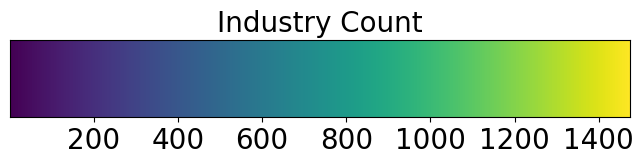

In [103]:
cmap_name = 'viridis'
vmin=1
vmax=geo_df_simplified['dsl'].max()
size=geo_df_simplified.shape[0]
fontsize = 20

values, colors = generate_log_colorscale(cmap_name, vmin, vmax, size=size)

# Plot the colorscale
plt.figure(figsize=(8, 1))
plt.imshow([colors], aspect='auto', extent=[vmin, vmax, 0, 1])
plt.yticks([])
plt.xticks(fontsize=fontsize)
plt.title(f'Industry Count', fontsize=fontsize)
plt.savefig('legend.jpg',bbox_inches='tight', transparent=True)
plt.show()

Convert the image to html

In [100]:
legend_html = generate_html_from_fig("legend.jpg")

Apply the colormap values to the dataframe:

In [86]:
norm = mp_color.LogNorm(vmin, vmax)
geo_df_final = colormap_dataframe(geo_df_simplified, value_col='dsl', cmap=mpl.colormaps[cmap_name], norm=norm)
geo_df_final.sample(5)

,stname,dtname,dsl,geometry,R,G,B,A
456,Bihar,Rohtas,14,"POLYGON ((84.04662 25.37478, 84.11758 25.35876...",45,110,142,100
261,Uttar Pradesh,Mainpuri,1,"POLYGON ((78.88771 27.47325, 78.92601 27.44604...",68,1,84,100
258,Tamil Nadu,Cuddalore,45,"MULTIPOLYGON (((79.71001 11.88915, 79.71884 11...",31,149,139,100
340,Madhya Pradesh,Shajapur,7,"POLYGON ((76.43604 23.63332, 76.46314 23.59248...",56,86,139,100
667,Himachal Pradesh,Bilaspur,7,"POLYGON ((76.70675 31.59542, 76.73067 31.58152...",56,86,139,100


Now convert the geodataframe to geojson for visualization:

In [87]:
geo_df_json = eval(geo_df_final.to_json())

Now plot the results:

In [104]:
INITIAL_VIEW_STATE = pdk.ViewState(latitude=20.5937, longitude=78.9629, zoom=3)

tooltip = {
    "html": """
    <div style='background-color: #2c3e50; padding: 10px; border-radius: 5px; width: auto;'>
        <p style='color: #ecf0f1; font-family: Arial, sans-serif; font-size: 14px;'>
            <strong>State:</strong> {stname}<br>
            <strong>District:</strong> {dtname}<br>
            <strong>Industry Count:</strong> {dsl}
        </p>
    </div>
    """,
    "style": {
        "backgroundColor": "#2c3e50",
        "color": "#ecf0f1",
        "borderRadius": "5px",
        "fontFamily": "Arial, sans-serif",
        "fontSize": "14px",
    }
}

geojson = pdk.Layer(
    type = "GeoJsonLayer",
    data = geo_df_json,
    opacity=0.8,
    pickable=True,
    stroked=True,
    filled=True,
    get_fill_color="[properties.R, properties.G, properties.B, properties.A]",
    get_line_color = [168, 0, 0, 100],
    get_line_width=500,
)

geo_map = pdk.Deck(layers=[geojson], initial_view_state=INITIAL_VIEW_STATE, tooltip=tooltip, description=legend_html)

For more properties check here: https://deck.gl/docs/api-reference

Display the plot

In [106]:
# geo_map

### Plotly


Using plotly, the plotting takes considerable time

In [28]:
# %%time

# fig = px.choropleth_map(geo_df,
#                         geojson=geo_df.geometry,
#                         locations=geo_df.index,
#                         color="dsl",
#                         hover_name='dtname',
#                         center={"lat": 20.5937, "lon": 78.9629},
#                         map_style="open-street-map",
#                         zoom=4)

In [29]:
!pwd

/content


## Visualization using lonboard

### Setup environment

In [30]:
# !pip install -q overturemaps
# !pip install -q lonboard
# !pip install -q palettable

### Imports

In [31]:
# import numpy as np
# import overturemaps
# from matplotlib.colors import LogNorm
# from palettable.colorbrewer.sequential import Oranges_9

# from lonboard import Map, PolygonLayer
# from lonboard.colormap import apply_continuous_cmap

### filter only required columns from geodataframe

In [32]:
# req_cols = ['Dist_LGD', 'stname', 'dtname','geometry','dsl']
# geo_df_final = geo_df[req_cols].copy()
# # Convert the geometry column to WKT
# # geo_df_final['geometry'] = geo_df_final['geometry'].apply(lambda geom: geom.wkt)
# type(geo_df_final)

### Create the colormap for visualization

In [33]:
# dsl_counts = geo_df_final['dsl'].to_numpy()
# dsl_counts = np.nan_to_num(dsl_counts, nan=0)

# normalizer = LogNorm(1, dsl_counts.max(), clip=True)
# normalized_heights = normalizer(dsl_counts)

# colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [34]:
# # view_state = {
# #     "longitude": -73.98416810282863,
# #     "latitude": 40.72651721370669,
# #     "zoom": 12.726630492730596,
# #     "pitch": 59.80465353190481,
# #     "bearing": 13.243243243243244,
# # }

# layer = PolygonLayer.from_geopandas(
#     geo_df_final,
#     get_fill_color=colors,
#     pickable=True
# )


# m = Map(layer, show_tooltip=True)

# # # Define a function to handle click events
# # def handle_click(event):
# #     with output:
# #         print(f"{event}")

# # m.observe(handle_click)
# m

To Learn more on events on the map:

1. [Linking the maps](https://developmentseed.org/lonboard/latest/examples/linked-maps/#linking-the-maps-the-easy-way-to-understand)

## Push to Git Repository

In [35]:
# !git clone https://github.com/kavyajeetbora/ASI.git